### Application of $\chi^2$ on ASCAD

On a per-sample-point basis.

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from tools.nbloader import NotebookLoader

from tools.traceloader import ASCAD, TraceGroup

sns.set_style("whitegrid")

In [24]:
KEY_SIZE = 256
TRACE_LEN = 700

ascad = ASCAD()
ascad.default.profile.traces.shape

(50000, 700)

In [25]:
chi2 = NotebookLoader(["../tvla"]).load_module('chi2')

importing Jupyter notebook from ../tvla/chi2.ipynb


### chi-squared sliding window

In [26]:
def sliding_window(tg: TraceGroup, key_l=1, key_r=1, progress=True):
    trace_l = tg.profile.filter_traces(key_l)
    trace_r = tg.attack.filter_traces(key_r)

    window = 50
    trace_size = 1400
    acc = []

    window_ixs = range(0, trace_size - window)
    if progress:
        window_ixs = tqdm(window_ixs)

    for ix in window_ixs:
        poi = (ix, ix + window)
        p_value = 1 - chi2.chi_squared(chi2.count(trace_l, poi), chi2.count(trace_r, poi))
        acc.append((ix, p_value))

    return acc

SW_EQ = sliding_window(ascad.default)

100%|██████████| 1350/1350 [00:01<00:00, 781.44it/s]


### Experiments with sliding window on $\chi^2$

With a sliding window over only 1, a

In [27]:
poi = NotebookLoader(["../"]).load_module("data.poi")

importing Jupyter notebook from ../poi.ipynb


<AxesSubplot:label='2743cbe2-44e0-4093-bc98-239776580782'>

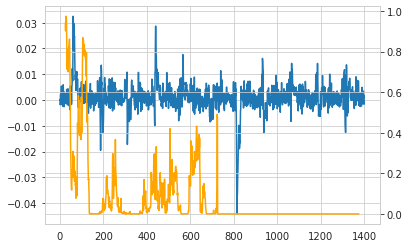

In [28]:
sns.lineplot(data=poi.MOMENT_DIFFERENCES[1])
ax2 = plt.twinx()
sns.lineplot(data=[*([np.nan] * 25), *list(zip(*SW_EQ))[1]], color='orange')